<a href="https://colab.research.google.com/github/adrianatrevinoe/ArtificialInteligenceWorks/blob/main/Tarea_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Universidad de Monterrey
##### Department of Mechanical and Electronic Engineering

**Collaborative assignment**    
Course: Artificial intelligence   
Lecturer: Andrés Hernández Gutiérrez     
Due date: Monday 14 March 2022 before 11.59pm    

---

**(2pts) What does the cell below do?**   
Permite el acceso al drive personal de cada integrante del equipo para la obtencion de datos del archivo `portland-oregon-house-pricing.csv`

In [ ]:
## Mount Google Drive in Collab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**(1pt) What does the cell below do?**   
Importa las librerias


+ ```numpy```: this is used for scientific computation. For further details on this library, visit [this link](https://numpy.org/).
+ ```matplotlib```: this allows us to visualise plots.
+ ```pandas```: effective library for reading data from file.
+ ```time```: library that provides many ways of representing the time in code. Provides time related functions.
+ ```sklearn```: One of the most useful libraries for machine learning, contains functions for machine learning, statistical modeling (classification, regression, clustering and dimensionality reduction), 
+ ```mplot3d```:Toolkit that generates  3D plots.



In [ ]:
# Imports standard libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.datasets import fetch_california_housing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from mpl_toolkits.mplot3d import axes3d
from sklearn.metrics import r2_score, mean_squared_error

**(1pt) What does the cell below do?**   
Obtiene los datos a partir del archivo `portland-oregon-house-pricing.csv`

+ ```pd.read_csv()```: _Read_csv se usa con la libreria de pandas, y sirve para poder leer los datos dentro de un archivo tipo .csv. Lee valores separados por comas_
+ ```filepath_or_buffer```: _Es la direccion de donde se desea sacar la información, va y la busca en el path que le indicas._
+ ```skiprows```: _Se agregan las líneas que no se desean leer, se saltan al principio del archivo._

In [ ]:
# Load data from file
housing_price = pd.read_csv(filepath_or_buffer="/content/drive/MyDrive/Colab Notebooks/datasets/portland-oregon-house-pricing.csv", sep=',', skiprows=0)

**(2pts) What does the cell below do?**   
Guarda en la variable **x** las columnas *size* y *nbed* del archivo excluyendo los encabezados con `.iloc[:,2].to_numpy` donde `to_numpy` quita los encabezados, al ser 2 columnas, para dejar los datos en forma matricial. La instruccion matriz `[:,:2]` implica que se guardan todos los renglones (:) de las columnas 0 hasta la 2 (:2) excluyendo la columna 2.   
Y, guarda en la variable **y** la columna *price* excluyendo el encabezado con `.iloc[:,-1].to_numpy` donde con `.iloc[:,-1]` seria suficiente para eliminar el encabezado al ser una sola columna, por el contrario, como buena practica y para evitar errores se uso `to_numpy` para quita el encabezado y, de este modo, dejar los datos en forma vectorial. La instruccion matriz `[:,-1]` implica que se guardan todos los renglones (:) de la ultima columna (-1)

In [ ]:
# Retrieve the features and labels
x = housing_price.iloc[:,:2].to_numpy() # x= col 1 y 2 (size, ndbed)
y = housing_price.iloc[:,-1].to_numpy() # y = col 3 ($)

**Shuffle the completed dataset** 


Se barajean los contenidos de cada variable en si mismas dejando cada elemento en su respectiva columna y cambiando su indexacion renglon, respetando el contenido que tenia el elemento inicialmente por renglon como si **x** y **y** 

*   List item
*   List item

concantenaran en una misma matriz, `[:,0:2]` y `[:,1]` a `[:,0:3]`. Entonces se regresan x y y ya barajeados, y nos dice al igual el tamaño que tienen estas variables.

+ ```shape```: _Indica cuantas columnas y filas se tiene en un arreglo, te da el tamaño del archivo.
+ ```f-string```: _Imprime palabras, letras, números etc. en forma de un string, tiene {} para reemplazar valores. Lo que imprime va dentro de ""._

In [ ]:
x, y = shuffle(x, y)    #SHUFFLE
print(f"Size of features: {x.shape}")  #X, (47,2)
print(f"Size of labels: {y.shape}") # Y (47,1)

Size of features: (47, 2)
Size of labels: (47,)


#### Exploratory data analysis

**(4pts) What does the cell below do?**   
Importamos `seaborn`, la cual es usada para visualizacion de data y explorar datos analiticos mediante la comparacion por pares. Esta libreria funciona facilmente con dataframes y la libreria de pandas. Aquí podemos observar que se crean distintas gráficas, especificamente la correlación de 2 datos o solo la gráfica de 1 solo dato(datos univariados), por ejemplo en la primera fila vemos en la primera gráfica un histograma de tamaño nadamas, en al segunda tamaño con num de habitaciones y la tercera tamaño con precio. Para esto se usa `pairplot`, la cual nos ayuda a visualizar la relacion entre varios datos, obteniendo una matriz de gráficas. `set_palette` solo es el color de las gráficas.

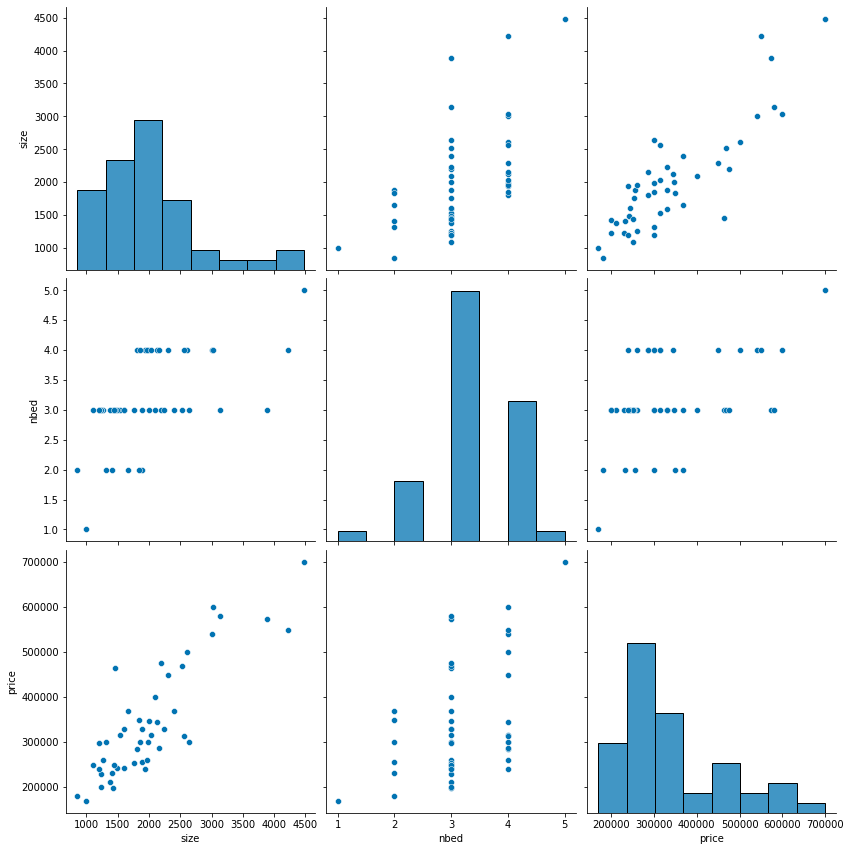

In [ ]:
import seaborn as sns
sns.set_palette('colorblind')
sns.pairplot(data=housing_price, height=4);

**SIZE vs PRICE linear regression**   
Genera un grafico con *size* de **x** y los datos de **y**, datos representados como circulos rojos y grid activado. Se agrega el encabezado, etiquetado en **x** y **y** con unidades, donde **$** marca el inicio y final de la escritura LaTex.   
Se visualiza los datos del precio con respecto al tamaño.
+ ```plt.figure()```: _Crea una nueva figura_
+ ```figsize=```: _Especifica el tamaño en pulgadas de la figura_
+ ```plt.xlabel```: _Nombra el eje x en la gráfica_
+ ```plt.ylabel```: _Nombra el eje y en la grafica_
+ ```plt.title```: _Incluye el nombre de la gráfica_
+ ```plt.grid```: _Te da la opcion de poner las lineas de grid en la gráfica  si se pone (true) la pone, si se pone (false) no se incluye._

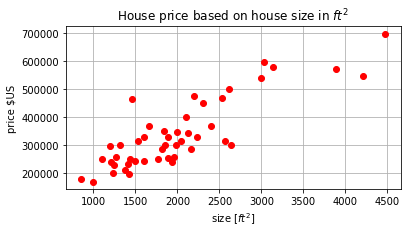

In [ ]:
# Visualise house price vs house size 
# x[:,0] <- house size
# y = price
plt.figure(figsize=(6,3))
plt.plot(x[:,0], y, 'or') # x= size (9), y=price
plt.xlabel(r"size [$ft^2$]")
plt.ylabel(r"price \$US")
plt.title(r"House price based on house size in $ft^2$")
plt.grid(True)

**PRICE vs NBED**   
Genera un grafico con *nbed* de **x** y los datos de **y**, datos representados como circulos rojos y grid activado. Se agrega el encabezado, etiquetado en **x** y **y** con unidades, donde **$** marca el inicio y final de la escritura LaTex.   
Se visualiza los datos del precio con respecto al numero de cuartos.

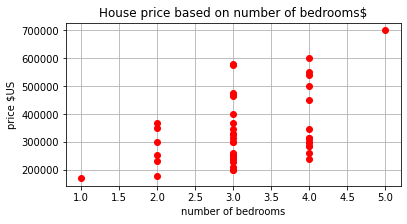

In [ ]:
# Visualise house price vs house number of bedrooms
# x[:,1] <- number of bedrooms 
plt.figure(figsize=(6,3))
plt.plot(x[:,1], y, 'or')
plt.xlabel(r"number of bedrooms")
plt.ylabel(r"price \$US")
plt.title(r"House price based on number of bedrooms$")
plt.grid(True)

**relaciona price con 2 variables 3D** 
Genera un grafico 3D de puntos scatter, circulos rojos para representar cada dato, con una elevacion en **z** de 30 y un angulo azimut de -120 en el plano **x, y** con ax.view_init, y, se despliega el grid. Encabezado y etiquetado en todos los ejes. Se uso axes3d.
Se visualiza los datos del precio con respecto al tamaño y el numero de cuartos, en este programa no se puede visualizar completamente el gráfico, no se puede rotar, pero si podríamos rotarlo podriamos ver también los datos con respecto a 2 caracteristicas solamente y a 3 también.

+ ```fig.add_subplot()```: _Crea una nueva figura_
+ ```ax.view_init```: _Indica la elevación y el azimut de la gráfica_
+ ```ax.scatter```: _ used to plot a scatter of y vs. x with varying marker size and/or color_
+ ```ax.set_xlabel```: _Agrega un titulo al eje x de la figura_
+ ```ax.set_ylabel```: _Agrega un titulo al eje y de la figura_
+ ```ax.set_zlabel```: _Agrega un titulo al eje z de la figura_
+ ```ax.set_title```: _Agrega un titulo de la figura_

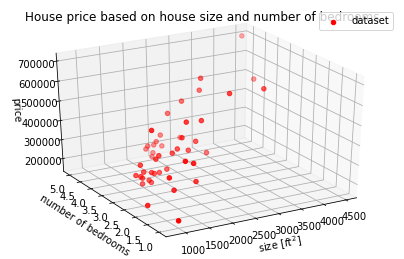

In [ ]:
# Visualise house price vs (house size and number of bedrooms)
%matplotlib inline
fig = plt.figure(figsize=(7,4.5))
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(elev=30, azim=-120)
ax.scatter(x[:,0], x[:,1], y,  c='r', marker='o', label='dataset')
ax.set_xlabel(r'size [$ft^2$]')
ax.set_ylabel('number of bedrooms')
ax.set_zlabel('price')
ax.set_title("House price based on house size and number of bedrooms")
plt.legend()
plt.grid(True)

**Split dataset**

**SPLIT DATA**   
La funcion `train_test_split` mezcla el arreglo, y, divide al 10% de este hacia los arreglos de entrenamiento: **x_train** y **y_train**, y el porcentaje restante hacia los arreglos de prueba: **x_test** y **y_test**. Se separan datos de prueba con datos de entrenamiento.

In [ ]:
# Split data into the training and the test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10) #10% for test, 90% training  

**(2pts) What does the cell below do?**   
Se imprime con el f-string las dimensiones de los arreglos de entranamiento y prueba. Podemos observar que ahora ya se dividen los datos ya que tenemos 42 de entenamiento y 5 de prueba, 5 siendo el 10% (47 -10% =4.7) ya que originalmente teniamos 47, 42+5=47. Se escogio 10% ya que se tienen pocos datos en total (47) entonces si escogeriamos un numero mayor de prueba no daria buenos resultados ya que no se entreno con más datos.

In [ ]:
# Find the number of samples per dataset
print(f"Size of features in the training set: {x_train.shape}") # x= 42 entrenamiento, 90% ( col)
print(f"Size of labels in the training set: {y_train.shape}") #y = 42 entenamiento ( 1 col)
print(f"Size of features in the testing set: {x_test.shape}") # x= 5% prueba
print(f"Size of labels in the testing set: {y_test.shape}") # y= 5 entrenamiento 

Size of features in the training set: (42, 2)
Size of labels in the training set: (42,)
Size of features in the testing set: (5, 2)
Size of labels in the testing set: (5,)


#### Exploratory data analysis (train and test datasets)

**Visualiza training y test sets (rojo train, azul test)**   
Genera un grafico 3D de puntos scatter, circulos rojos para representar cada dato de entrenamiento y circulos azules para representar cada dato de prueba, con una elevacion en **z** de 30 y un angulo azimut de -120 en el plano **x, y**, y, se despliega el grid. Encabezado y etiquetado en todos los ejes.   
Se visualiza los datos de prueba/validación (puntos azules) y de entrenamiento (puntos rojos), el precio con respecto al tamaño y el numero de cuartos.

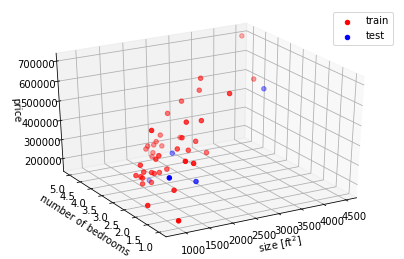

In [ ]:
# Visualise the training and test datasets
%matplotlib inline
fig = plt.figure(figsize=(7,4.5))
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(elev=30, azim=-120)
ax.scatter(x_train[:,0], x_train[:,1], y_train,  c='r', marker='o', label='train') #x 2 cols, 0 1--- y 1 col
ax.scatter(x_test[:,0], x_test[:,1], y_test,  c='b', marker='o', label='test')
ax.set_xlabel(r'size [$ft^2$]')
ax.set_ylabel('number of bedrooms')
ax.set_zlabel('price')
plt.legend()
plt.grid(True)

**(1pt)  # de datos de entrenamiento**   
Imprime las dimensiones de los arreglos de entrenamiento en **x** y **y**, que son 42 de entrenamiento con .shape.

In [ ]:
print(f"Size of training features: {x_train.shape}")
print(f"Size of training labels: {y_train.shape}")

Size of training features: (42, 2)
Size of training labels: (42,)


#### Fit the model to dataset using house size only

**Linear model con size?**   
`x_train[:,0].reshape(-1,1)` define que el arreglo de 2 columnas se redimensionara (`reshape`) a la misma cantidad de renglones (-1) y una sola columna (1), dejando la columna *size* (`x_train[:,0]`) unicamente, entonces reshape pasa los datos como columna.

Se genera el modelo de regresion lineal de la columna *size* (que se explico arriba) del arreglo **x_train** con el arreglo **y_train**, y se depliegan los resultados. Aquí usamos únicamente los datos del tamaño de la casa (columna 0). Nos entrega el tamaño w0 quue es el termino independiente(71516, intersección con eje vertical) y w1 (134, pendiente) que es el parametro que multiplica a x1(tamaño de la casa)

+```reshape``` Se usa para crear una nueva shape a un array sin cambair sus datos.

In [ ]:
# Fit a single linear regression model to the training dataset
reg_model_house_size = linear_model.LinearRegression().fit(x_train[:,0].reshape(-1,1), y_train)
print(f"Regression model parameters: {reg_model_house_size.intercept_, reg_model_house_size.coef_ }")

Regression model parameters: (70008.24222811643, array([136.11887821]))


#### Predict house price for the training data

**Predecir salidas**   
Usando el modelo de regresion lineal `reg_model_house_size` predice a partir de los datos de entrenamiento, la columna *size* del arreglo **x_train**, **y_train_predict**

In [ ]:
# Predict the house price for the training data using the just fitted model
y_train_predicted = reg_model_house_size.predict(x_train[:,0].reshape(-1,1))

#### Visualise the fitted model

**(4pts) What does the cell below do?**   
Genera un grafico con *size* de **x_train** y los datos de **y_train**, datos representados como circulos rojos, y otro cuyos grafico se genera con *size* de **x_train** y los datos de **y_train_predict**, datos representados como un grafico de lineas azules. Se agrega el encabezado, etiquetado en **x** y **y** con unidades, donde **$** marca el inicio y final de la escritura LaTex.   
Se visualiza los datos de entrenamiento y los datos de prediccion obtenidos a partir de los datos de entrenamiento, el precio con respecto al tamaño y el numero de cuartos.

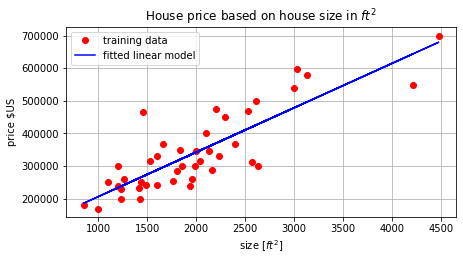

In [ ]:
# Visualise the estimate model fitted to the training set
%matplotlib inline
plt.figure(figsize=(7,3.5))
plt.plot(x_train[:,0], y_train, 'or')
plt.plot(x_train[:,0], y_train_predicted, '-b')
plt.xlabel(r"size [$ft^2$]")
plt.ylabel(r"price \$US")
plt.title(r"House price based on house size in $ft^2$")
plt.legend(["training data", 'fitted linear model'])
plt.grid(True)

#### Compute performance metrics on the training dataset

**(3pts) What does the cell below do?**   
Imprime el coeficiente de determinacion R^2 con los datos de prueba (**y_train**) vs los datos de prediccion (**y_train_prediction**)
Imprime el error cuadratico medio con los datos de prueba (**y_train**) vs los datos de prediccion (**y_train_prediction**), `squared=False` determina que regresa el RMSE (raiz del error cuadratico medio), si fuera verdadero no se le haría un calculo de raiz cuadrada. Con la raiz cuadrada nos dio un coeficiente de dterminación de 0.74, este es un buen modelo ya que 1 es que es un muy buen modelo, un modelo perfecto que predice correctamente,0.0-0.10 indica un modelo debil o sin ninguna correlación, 0.10-0.7 indica un modelo débil a media correlación, y .70-1 indica un modelo fuerte. Entonces tenemos un modelo fuerte de 0.74.

In [ ]:
# Compute the Coefficient of Determination and the Mean Squared Error for the just fitted linear model
print(f"R2-score (coefficient of determination): {r2_score(y_train, y_train_predicted)}")
print(f"Mean squared error: {mean_squared_error(y_train, y_train_predicted, squared=False)}")

R2-score (coefficient of determination): 0.7132978800537173
Mean squared error: 66052.14443130136


#### Plot the residual error and its histogram

**(4pts) What does the cell below do?**   
Se guarda el error entre los datos **y_train** y **y_train_prediction** en **residual_error** y este se grafica.   
Se visualiza el error residual con respecto al numero de datos de entrenamiento. Es la gráfica de lo que debería de predecir con lo que esta prediciendo (gráfica del error).

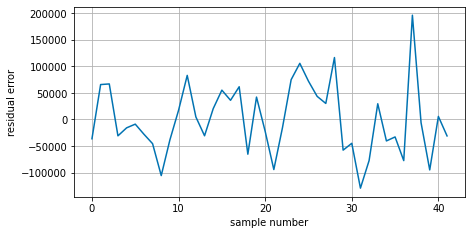

In [ ]:
# Compute and plot the residual errors
residual_error = y_train - y_train_predicted
plt.figure(figsize=(7,3.5))
plt.xlabel('sample number')
plt.ylabel('residual error')
plt.grid(True)
plt.plot(residual_error);

**(4pts) What does the cell below do?**   
Se genera el histograma con plt.hist del **residual_error**, nombrando xlabel y ylabel, también definiendo el tamaño. Esta gráfica tiene aproximadamente una media 0 y no tiene muchos datos. Este histograma nos dice que el modelo lineal es correcto debido a que tiene la media aprox en 0 y distribución aparentamente normal. También incluye las leyendas, el tamaño y el grid.

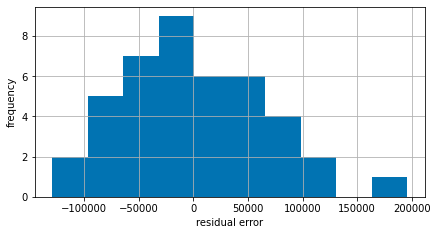

In [ ]:
# Plot the histogram of residual errors
plt.figure(figsize=(7,3.5))
plt.hist(residual_error)
plt.xlabel('residual error')
plt.ylabel('frequency')
plt.grid(True)

#### Predict house price for the testing set

**(2pts) What does the cell below do?**   
Usando el modelo de regresion lineal `reg_model_house_size` predice a partir de los datos de prueba, la columna *size* del arreglo **x_test**, **y_test_predict**

In [ ]:
# Predict the house price for the testing set using the house size feature only
# x_test[:,0] <- house size 
y_test_predicted = reg_model_house_size.predict(x_test[:,0].reshape(-1,1))

#### Plot the labels and their predictions for the testing set

**(4pts) What does the cell below do?**   
Crea una gráfica con los datos de prueba del dataset (puntos rojos) y los de predicción (puntos azules), esta gráfica nos dice que tanto tiene de error (distancia) los datos que hay en el dataset con los datos que se predijeron.

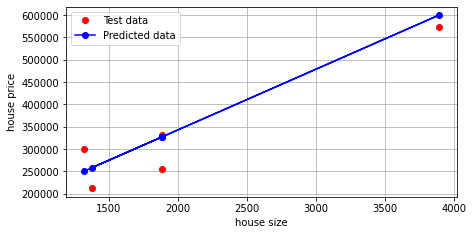

In [ ]:
plt.figure(figsize=(7,3.5))
plt.plot(x_test[:,0], y_test, 'or')
plt.plot(x_test[:,0], y_test_predicted, '-ob')
plt.xlabel("house size")
plt.ylabel("house price")
plt.legend(["Test data", 'Predicted data'])
plt.grid(True);

#### Compute the MSE for the testing set

**(2pts) What does the cell below do?**   
Calcula el error cuadrático medio de la distancia que explicamos arriba (training data set contra los datos de predicción), el false quiere decir que esta calculando la raiz cuadrada del MSE.

In [ ]:
print(f"Mean squared error: {mean_squared_error(y_test, y_test_predicted, squared=False)}")

Mean squared error: 45763.30359210527


## Linear regression using the number of bedrooms 

**(2pts) What does the cell below do?**   
Obtenemos el modelo de regresión únicamente del número de habitaciones, como podemos ver esto se observa ya que el índice es 1 en `x_train[:,1]`, ya que la columna 1 del .csv tiene el número de habitaciones.

In [ ]:
# Fit a single linear regression model to the training dataset
# x_train[:,1] <- number of bedrooms
reg_model_number_of_beds = linear_model.LinearRegression().fit(x_train[:,1].reshape(-1,1), y_train)
print(f"Regression model parameters: {reg_model_number_of_beds.intercept_, reg_model_number_of_beds.coef_ }")

Regression model parameters: (94050.18548387094, array([76312.41330645]))


#### Predict house price for the training data

**(2pts) What does the cell below do?**   
Usando el modelo de regresion lineal `reg_model_number_of_beds` (modelo de num de habitaciones) predice a partir de los datos de entrenamiento, la columna *size* del arreglo **x_train**, **y_train_predict**

In [ ]:
# Predict the house price for the training data using the just fitted model
y_train_predicted = reg_model_number_of_beds.predict(x_train[:,1].reshape(-1,1))

#### Visualise the fitted model

**(4pts) What does the cell below do?**   
Visualizamos el modelo de regresión lineal para el precio de la casa basado en las habitaciones, aquí vemos que los datos se distribuyen de manera lineal por la linea azul que representa el fitted linear model, los puntos rojos son los datos de entrenamiento.

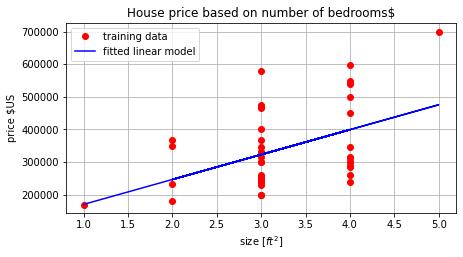

In [ ]:
# Visualise the estimate model fitted to the training set
%matplotlib inline
plt.figure(figsize=(7,3.5))
plt.plot(x_train[:,1], y_train, 'or')
plt.plot(x_train[:,1], y_train_predicted, '-b')
plt.xlabel(r"size [$ft^2$]")
plt.ylabel(r"price \$US")
plt.title(r"House price based on number of bedrooms$")
plt.legend(["training data", 'fitted linear model'])
plt.grid(True)

#### Compute performance metrics on the testing set

**(2pts) What does the cell below do?**   
Aquí nos da el coeficiente de determinación de la gráfica pasada el cual es 0.25 y quiere decir que tiene una correlación débil, al igual nos da el error cuadrático medio.

In [ ]:
# Compute the Coefficient of Determination and the Mean Squared Error for the just fitted linear model
print(f"R2-score (coefficient of determination): {r2_score(y_train, y_train_predicted)}")
print(f"Mean squared error: {mean_squared_error(y_train, y_train_predicted, squared=False)}")

R2-score (coefficient of determination): 0.21520904866389612
Mean squared error: 109281.95689094918


#### Plot the residual error and its histogram

**(4pts) What does the cell below do?**   
Aquí vemos una gráfica de la diferencia entre lo que debería de predecir y lo que en verdad predice, esto con el error residual que es los datos de entrenamiento menos los datos de entrenamiento predichos.

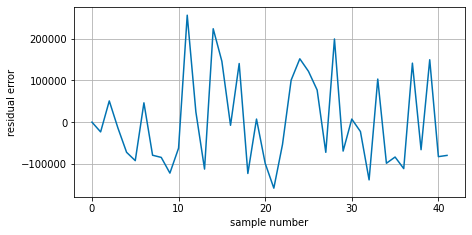

In [ ]:
# Compute and plot the residual errors
residual_error = y_train - y_train_predicted
plt.figure(figsize=(7,3.5))
plt.plot(residual_error)
plt.xlabel('sample number')
plt.ylabel('residual error')
plt.grid(True)

**(3pts) What does the cell below do?**   
Aquí vemos un histograma con plt.hist de el error residual, como dijimos que es los datos de entrenamiento menos los datos de entrenamiento predichos, y vemos que tiene una media de aproximadamente una media de 0. Esto es con el ánalisis de datos de entrenamiento. También incluye las leyendas, el tamaño y el grid.

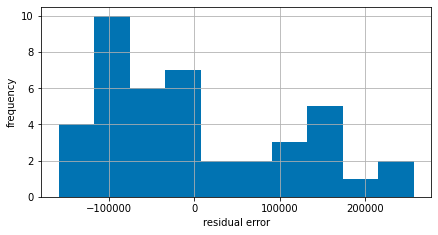

In [ ]:
# Plot the histogram of residual errors
plt.figure(figsize=(7,3.5))
plt.hist(residual_error)
plt.xlabel('residual error')
plt.ylabel('frequency')
plt.grid(True)

#### Predict house prices for the testing set

**(2pts) What does the cell below do?** - Usando el modelo de regresion lineal reg_model_number_of_beds predice a partir de los datos de entrenamiento, la columna size del arreglo x_train, y_train_predict Ahora haremos un analisis con los datos de prueba, usanndo la columna 1 que es numero de habitaciones [:,1].

In [ ]:
# Predict the house price for the testing set using the house size feature only
# x_test[:,1] <- number of bedrooms 
y_test_predicted = reg_model_number_of_beds.predict(x_test[:,1].reshape(-1,1))

#### Plot the labels and their predictions for the testing set

**(3pts) What does the cell below do?** - Aqui vemos que nos da una gráfica en donde se visualiza los datos de prueba y los datos de prueba predichos, y se grafica el tamaño en correlación con e precio. Se puede visualizar el error viendo que tan alejados estan los puntos rojos que son los datos de prueba con los datos predichos que son los puntos azules.

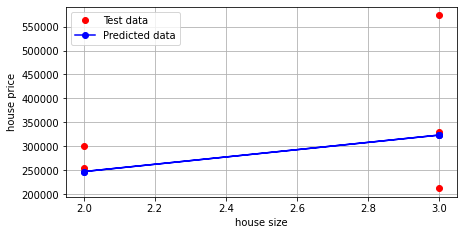

In [ ]:
plt.figure(figsize=(7,3.5))
plt.plot(x_test[:,1], y_test, 'or')
plt.plot(x_test[:,1], y_test_predicted, '-ob')
plt.xlabel("house size")
plt.ylabel("house price")
plt.legend(["Test data", 'Predicted data'])
plt.grid(True);

## Linear regression using both the house size and the number of bedrooms

**(2pts) What does the cell below do?** - Ahora se crea un modelo con el tamaño de la casa y el número de habitaciones, para esto se consideran las dos columnas x_train, y_train (ya no separamos solo 1 columna, ya se incluyen ambas). Se obtienen 3 parametros el primero es el parametro independiente, (interseccion con eje y), w1 (132) y w2 (3676). 

In [ ]:
# Fit a single linear regression model to the training dataset
reg_model_multivariate = linear_model.LinearRegression().fit(x_train, y_train)
print(f"Regression model parameters: {reg_model_multivariate.intercept_, reg_model_multivariate.coef_ }")

Regression model parameters: (100844.40847694644, array([   145.28085034, -15159.16337619]))


#### Predict house prices for the training set

**(2pts) What does the cell below do?** - Predecimos los valores de la correlación entre el precio y el numero de habitaciones.

In [ ]:
# Predict the house price for the training data using the just fitted model
y_train_predicted = reg_model_multivariate.predict(x_train)

#### Compute performance metrics on the training set

**(2pts) What does the cell below do?** - Nos da un coeficiente de correlación fuerte de 0.74 y al igual se calcula el error. (esto también incluyendo ambas columnas)

In [ ]:
# Compute the Coefficient of Determination and the Mean Squared Error for the just fitted linear model
print(f"R2-score (coefficient of determination): {r2_score(y_train, y_train_predicted)}")
print(f"Mean squared error: {mean_squared_error(y_train, y_train_predicted, squared=False)}")

R2-score (coefficient of determination): 0.7185585285730526
Mean squared error: 65443.349039485474


#### Plot the residual error and its histogram

**(2pts) What does the cell below do?** - Se visualiza el error residual con respecto al numero de datos de entrenamiento. Es la gráfica de lo que debería de predecir con lo que esta prediciendo (gráfica del error).

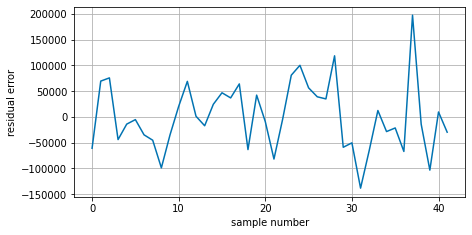

In [ ]:
# Compute and plot the residual errors
residual_error = y_train - y_train_predicted
plt.figure(figsize=(7,3.5))
plt.plot(residual_error)
plt.xlabel('sample number')
plt.ylabel('residual error')
plt.grid(True)

**(3pts) What does the cell below do?** - Aquí podemos observar el histograma con .hist del error residual, podemos observar que tiene una media de 0 y aproximadamente una distribución que parecería normal.  También incluye las leyendas, el tamaño y el grid.

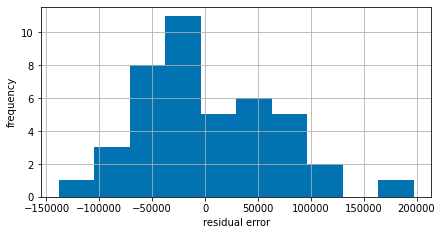

In [ ]:
# Plot the histogram of residual errors
plt.figure(figsize=(7,3.5))
plt.hist(residual_error)
plt.xlabel('residual error')
plt.ylabel('frequency')
plt.grid(True)

**(4pts) What does the cell below do?** -Aqui nos entrega una gráfica 3D, los puntos azules es lo que el modelo predice y el rojo que es el entrenamiento es lo que debería predecir. Nos da también un plano ajustado a nuestro modelo. 
Primero evaluamos el rango en el cual queremos evaluar el modelo multivariable a lo largo de c/u de las caracteristicas (x_pred y y_pred). Xpred son 50 datos entre 1000 y 4500 (costo de casas), y_pred son 50 datos entre 1 y 5 (num de habitaciones) (np.linspace). Con estos dos datos predichos (x y y) calculamos el grid con estos valores en 2D (np.meshgrid). 

Con flatten se aplana la matriz en una dimension, entonces aplanamos ambas la de x y la de y. y_train_predicted_on_fitted_plane obtiene los valores en Z del plano de casas predichas.

Lo demás es para la visualización del gráfico.



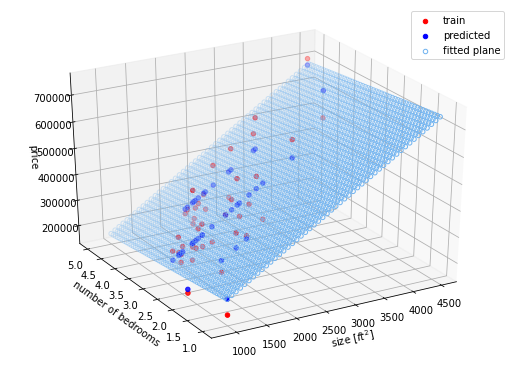

In [ ]:
# Visualise the training and test datasets
%matplotlib inline


x_pred = np.linspace(1000,4500,50)
y_pred = np.linspace(1, 5, 50)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)

grid_to_evaluate_fitted_plane = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
y_train_predicted_on_fitted_plane = reg_model_multivariate.predict(grid_to_evaluate_fitted_plane)


fig = plt.figure(figsize=(9,6.5))
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(elev=30, azim=-120)
ax.scatter(x_train[:,0], x_train[:,1], y_train,  c='r', marker='o', label='train')
ax.scatter(x_train[:,0], x_train[:,1], y_train_predicted,  c='b', marker='o', label='predicted')
ax.scatter(xx_pred.flatten(), yy_pred.flatten(), y_train_predicted_on_fitted_plane, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0', label='fitted plane')
ax.set_xlabel(r'size [$ft^2$]')
ax.set_ylabel('number of bedrooms')
ax.set_zlabel('price')
plt.legend()
plt.grid(True)

**(3pts) What model would you select to predict house prices?** - Escogeriamos el último modelo que tiene ambas variables, el tamaño junto con el número de habitaciones ya que este es el que tiene el coeficiente más alto de 0.7457 mientras que el del tamaño solo es 0.7453, y el número de habitaciones es 0.2547.

#### **(2pts) Individual conclusions**
#### Adriana:
Esta práctica nos ayudo a poder ver los diferentes modelos de regresión con respecto a diferentes variables, pudimos observar como los coeficientes de correlación fueron cambiando de acorde al modelo predicho, y obtuvimos de resultado que el mejor fue ambas variables juntas. Me ayudo la práctica a poder ver todos los resultados de cada variable y las variables juntas, también pude lograr entender un poco mejor todo lo de los datasets de entrenamiento, y de prueba/validación. Esta manera de ver la regresión fue útil ya que gráficamente podemos observar el comportamiento de lo que hacemos, siendo más fácil de entender. 


#### Susana:

En la elaboración de esta actividad pudimos analizar la aplicación de lo modelos de regresión simple y multivariable. Aplicando todos los pasos a seguir para una correcta elaboración y evaluación en la creación de este tipo de modelos, con ayuda del análisis estadístico en los errores de entrenamiento y prueba pudimos contemplar que modelo es el mas adecuado para la predicción de nuevos datos.   

#### Emilio:
Esta practica me ayuda para poder observar las distintas fomras en las que se pueden comparar las variables entre si para determinar que modelo es aquel que pueda explicar de manera mas precisa la predicion que el sistema propuesto hara dependiendo de los datos que hayamos destinado a la seccion de entrenamiento pues esta es una etapa importante para determinar la prediccion de los valores de validacion. Tambien me sirvio para ver que no siempre es mejor la variable de determinacion cuando se comparan las 3 variables a la vez. Pues a veces la la que mejor predice la respuesta son las de 2 variables y pues esto es mas barato que realizar las 3 a la vez. 



To complete this homework, download this Notebook and rename it as:

```ai-housing-price-prediction-team-01.ipynb``` 

for team 1, **change the team number accordingly** and upload the following files to Blackboard:

+ ```ai-housing-price-prediction-team-01.ipynb```
+ ```portland-oregon-house-pricing.csv``` - you assignment will be penalised with -5 points if this file is not submitted. 

_Happy learning! - Andrés_